In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

replacing blanks of totalcharges to 0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


put an extra sum()

In [5]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
df["customerID"].duplicated().sum()

0

In [8]:
df["SeniorCitizen"] = df["SeniorCitizen"].replace(0,"no")

In [9]:
df["SeniorCitizen"] = df["SeniorCitizen"].replace(1,"yes")

another method to replace

def convert(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(convert)

In [10]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,no,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,no,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,no,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


Data Cleaning done here


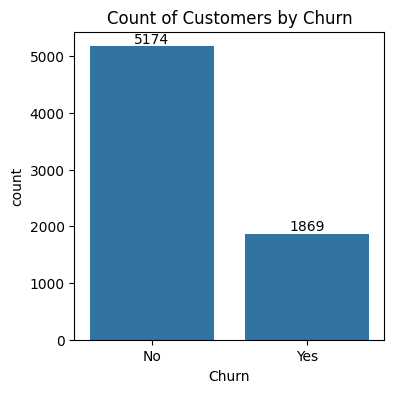

In [21]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x='Churn', data=df)
ax.bar_label(ax.containers[0])
plt.title('Count of Customers by Churn')
plt.show()

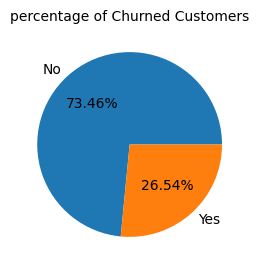

In [40]:
plt.figure(figsize=(3,3))
gb=df.groupby('Churn').agg({'Churn':"count"})

plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%")
plt.title('percentage of Churned Customers', fontsize=10)
plt.show()

from the above piechart we can conclude that 26.54% of customers have churned out. Now let's explore the reason behind it.

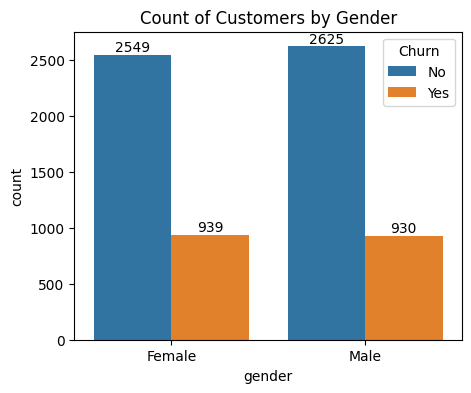

In [47]:
plt.figure(figsize=(5,4))
ax=sns.countplot(x='gender', data=df, hue='Churn')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count of Customers by Gender')
plt.show()

From the above countplot we can conclude that the churned customers are not gender specific.

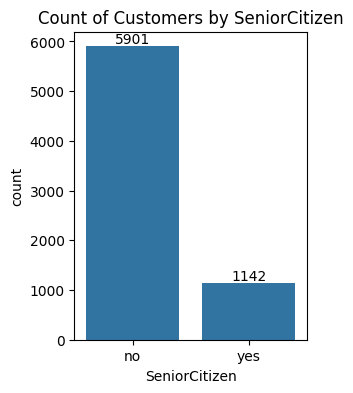

In [66]:
plt.figure(figsize=(3,4))
ax=sns.countplot(x='SeniorCitizen', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count of Customers by SeniorCitizen')
plt.show()

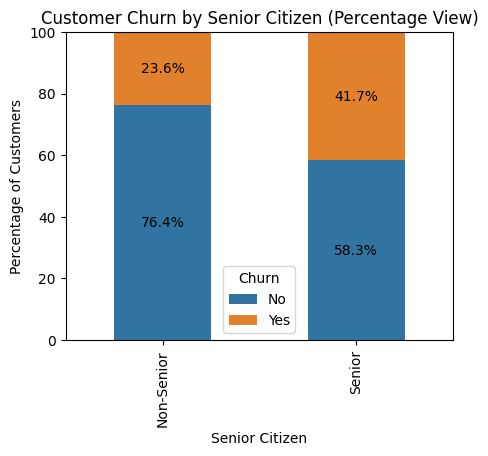

In [61]:
count_data = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='count')
total_counts = df['SeniorCitizen'].value_counts().sort_index()

# Convert counts to percentages
count_data['percentage'] = count_data.apply(lambda row: (row['count'] / total_counts[row['SeniorCitizen']]) * 100, axis=1)

# Pivot to get the right format for stacking
pivot_data = count_data.pivot(index='SeniorCitizen', columns='Churn', values='percentage').fillna(0)

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(5, 4))
pivot_data.plot(kind='bar', stacked=True, ax=ax, color=["#3274a1", "#e1812c"])  # Changed colormap to specific colors

# Add percentage labels
for container in ax.containers:
    labels = [f"{v:.1f}%" if v > 0 else "" for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type="center")

# Formatting
plt.title('Customer Churn by Senior Citizen (Percentage View)')
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage of Customers')
plt.xticks(ticks=[0, 1], labels=['Non-Senior', 'Senior'])
plt.legend(title='Churn')
plt.ylim(0, 100)  # Set y-axis limit to 100%

plt.show()

From the above charts we can conclude that the number of non-senior citizen is higher though senior citizens are leaving at a higher rate i.e. 41.7% than non-senior citizens i.e. 23.6%.

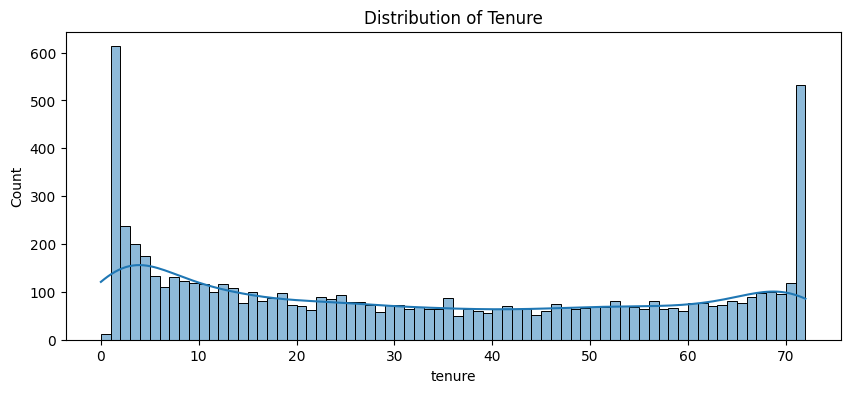

In [77]:
plt.figure(figsize=(10,4))
sns.histplot(x='tenure', data=df, bins=72, kde=True)
plt.title('Distribution of Tenure')
plt.show()

from this graph we can say that customers who took services for longer duration have stayed and those who took service for 1 or 2 months have churned out.

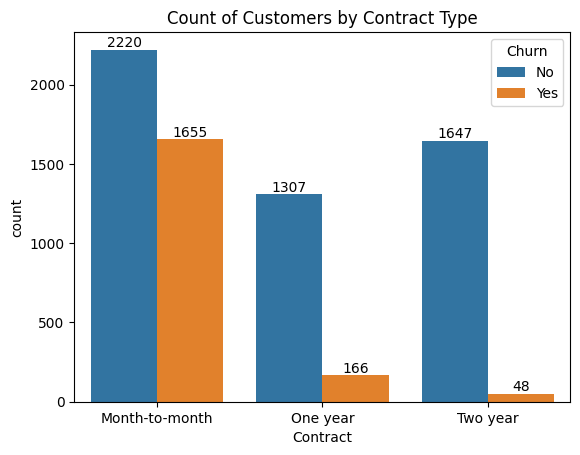

In [81]:
ax=sns.countplot(x='Contract', data=df, hue='Churn')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count of Customers by Contract Type')
plt.show()

From the above countplow we can conclude that customers who have month-to-month contract are likely to churn than those who have one year or two year contract.

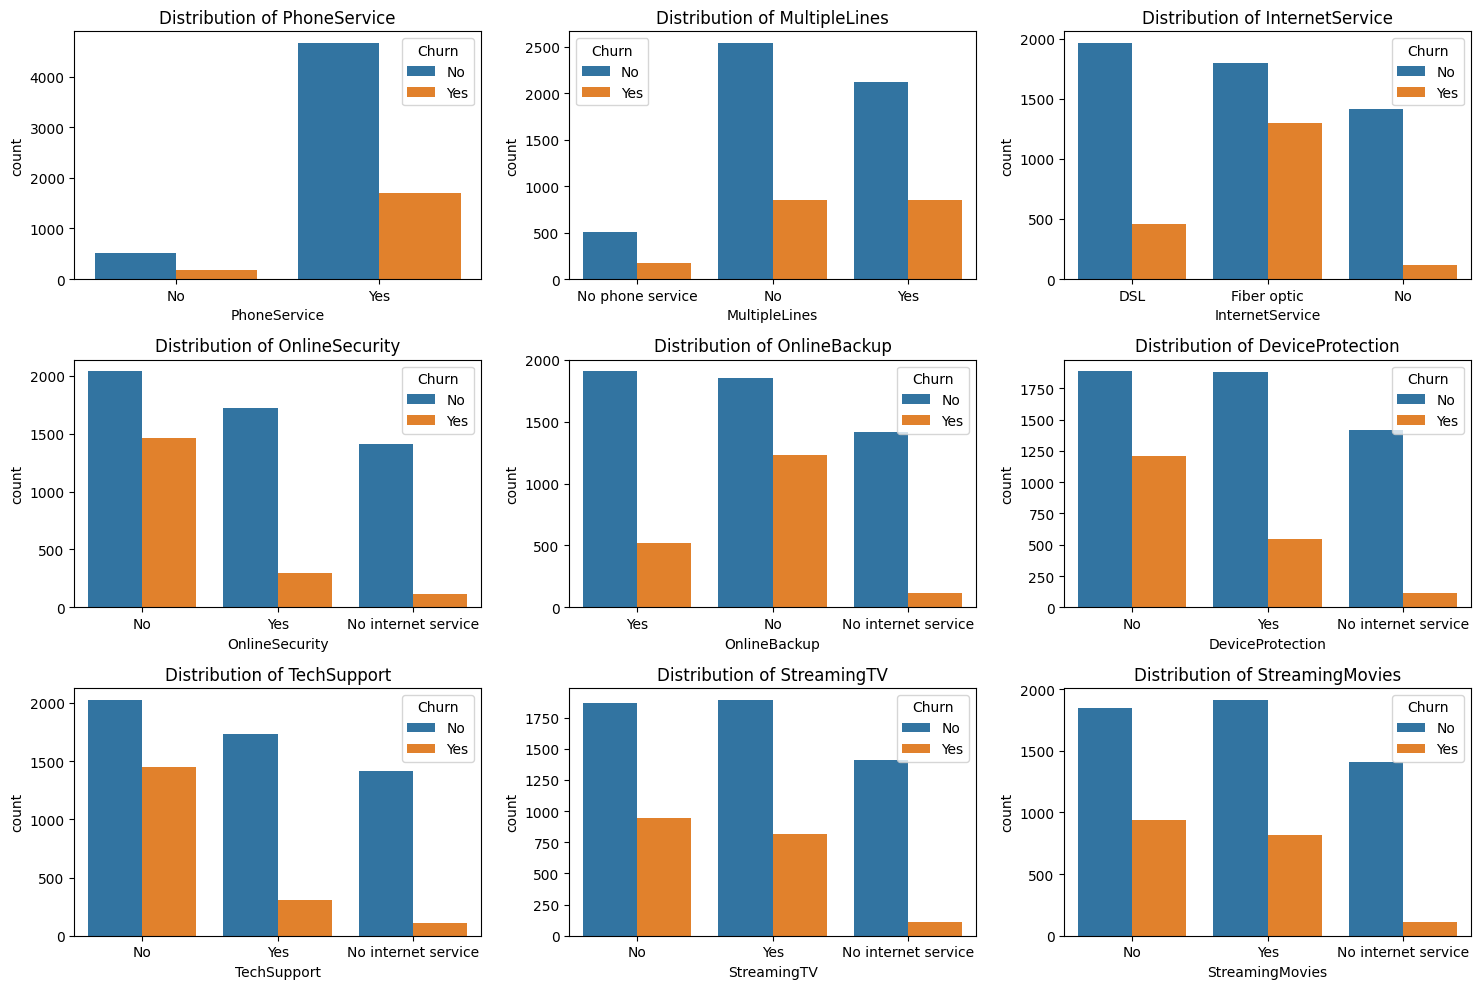

In [90]:
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))  # 3x3 grid

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create countplots for each column
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue='Churn')
    axes[i].set_title(f'Distribution of {col}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

A majority of customers have PhoneService and InternetService, regardless of churn status.
A significant portion of customers with PhoneService also have MultipleLines.
OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies these services have higher adoption rates among customers who didn't churn compared to those who did.

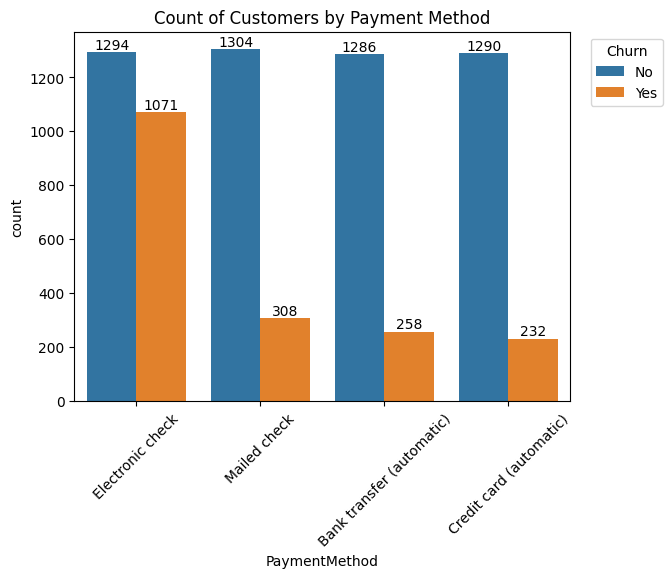

In [100]:
ax=sns.countplot(x='PaymentMethod', data=df, hue='Churn')
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation=45)
plt.legend(title='Churn',bbox_to_anchor=(1.20, 1))
plt.title('Count of Customers by Payment Method')
plt.show()

from this graph we can say that customers those who use automatic paymet methods are more likely to stay and those who use electronic check or mailed check as payment method are more likely to churned out.